<a href="https://colab.research.google.com/github/JPaivaCarvalho/JoaoPaivaCarvalho/blob/main/Relax_Predicting_User_Adoption_Takehome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Relax](https://raw.githubusercontent.com/interviewquery/takehomes/relax_1/relax_1/logo.png)

The data is available as two attached CSV files:
```
takehome_user_engagement.csv
takehome_users.csv
```
The data has the following two tables:

1.  A user table ( `takehome_users.csv`) with data on 12,000 users who
    signed up for the product in the last two years. This table
    includes:

    -   `name`: the user's name

    -   `object_id`: the user's id

    -   `email`: email address

    -   `creation_source`: how their account was created. This takes
        on one of 5 values:
        - `PERSONAL_PROJECTS`: invited to join another user's personal workspace
        - `GUEST_INVITE`: invited to an organization as a guest (limited permissions)
        - `ORG_INVITE`: invited to an organization (as a full member)
        - `SIGNUP`: signed up via the website
        - `SIGNUP_GOOGLE_AUTH`: signed up using Google Authentication (using a Google email account for their login id)

-   `creation_time`: when they created their account

-   `last_session_creation_time`: unix time_stamp of last login

-   `opted_in_to_mailing_list`: whether they have opted into receiving
    marketing emails

-   `enabled_for_marketing_drip`: whether they are on the regular
    marketing email drip

-   `org_id`: the organization (group of users) they belong to

-   `invited_by_user_id`: which user invited them to join (if
    applicable).

2.  A usage summary table ( `takehome_user_engagement.csv` ) that has a
    row for each day that a user logged into the product.

Defining an _"adopted user"_ as a user who *has logged into the
product on three separate days in at least one seven-­day period*,
**identify which factors predict future user adoption**.

We suggest spending 1­2 hours on this, but you're welcome to spend more
or less.



In [44]:
!git clone --branch relax_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/relax_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1968/1968), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 1968 (delta 755), reused 1933 (delta 729), pack-reused 0 (from 0)
Receiving objects: 100% (1968/1968), 299.41 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (755/755), done.
/content/takehomes/relax_1/takehomes/relax_1
example_solution  metadata.json       takehome_user_engagement.csv
logo.png	  takehomefile.ipynb  takehome_users.csv


#DATA PREPARATION

# Import Libraries And Preview The Tables

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
data_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
data_engage = pd.read_csv('takehome_user_engagement.csv')

# Preview the first rows of each table
print("takehome_users.csv")
display(data_users.head())

print("takehome_user_engagement.csv")
display(data_engage.head())

takehome_users.csv


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


takehome_user_engagement.csv


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Set 'object_id' And 'time_stamp' As Column Index

In [61]:
data_users = pd.read_csv('takehome_users.csv', encoding='latin-1', header=0)
data_users.columns = data_users.columns.str.strip()
data_users.set_index('object_id', inplace=True)
print(data_users.index.name)
display(data_users.head())

object_id


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [64]:
# Load the CSV files
data_engage['time_stamp'] = pd.to_datetime(data_engage['time_stamp'])

# Set 'time_stamp' as index
data_engage.set_index ('time_stamp', inplace=True)

# Display the first rows
print(data_engage.index.name)
display(data_engage.head())

time_stamp


,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


# Group By User_id

In [67]:
# Ensure the index is reset (to access the time_stamp column)
data_engage_reset = data_engage.reset_index()

# Group by user_id
df_users_adopted = data_engage_reset.groupby('user_id').agg({
    'visited': 'sum',  # total number of visits (pages visited)
    'time_stamp': lambda x: list(x)  # list of time_stamps when those visits occurred
}).reset_index()

# Rename columns
df_users_adopted.columns = ['user_id', 'total_visits', 'login_time_stamps']

# View result
display(df_users_adopted.head())

,user_id,total_visits,login_time_stamps
0,1,1,[2014-04-22 03:53:30]
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201..."
2,3,1,[2013-03-19 23:14:52]
3,4,1,[2013-05-22 08:09:28]
4,5,1,[2013-01-22 10:14:20]


# Identify Which Users Are Adopted Users

In [79]:
adopted_users = set()

# Ensure datetime format
data_engage_reset['time_stamp'] = pd.to_datetime(data_engage_reset['time_stamp'])

# Group by user
grouped = data_engage_reset.groupby('user_id')

for user_id, group in grouped:
    # Get list of unique login days (without time)
    login_days = group['time_stamp'].dt.floor('D').drop_duplicates().sort_values().tolist()

    # Look for windows of 3 logins within 7 days
    for i in range(len(login_days) - 2):
        if (login_days[i+2] - login_days[i]).days <= 7:
            adopted_users.add(user_id)
            break

# Create DataFrame with unique user_id
users = pd.DataFrame(data_engage_reset['user_id'].unique(), columns=['user_id'])

# Label as adopted or non-adopted
users['adoption_status'] = users['user_id'].apply(
    lambda x: 'adopted user' if x in adopted_users else 'non-adopted user'
)

# Start with the original DataFrame that already has visits and time_stamps
df_users_adopted['adoption_status'] = df_users_adopted['user_id'].apply(
    lambda x: 'adopted user' if x in adopted_users else 'non-adopted user'
)

# Display the result
display(df_users_adopted.head())

,user_id,total_visits,login_time_stamps,adoption_status
0,1,1,[2014-04-22 03:53:30],non-adopted user
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",adopted user
2,3,1,[2013-03-19 23:14:52],non-adopted user
3,4,1,[2013-05-22 08:09:28],non-adopted user
4,5,1,[2013-01-22 10:14:20],non-adopted user


# Merge Datasets

In [95]:
# Rename 'object_id' to 'user_id'
data_users.rename(columns={'object_id': 'user_id'}, inplace=True)

# Merge df_users_adopted with data_users based on user_id
df_final = pd.merge(df_users_adopted, data_users, on='user_id', how='left')

# Drop 'level_0' and 'index' columns if they exist
df_final = df_final.drop(columns=['level_0', 'index'], errors='ignore')

# Display the cleaned result
display(df_final.head())

,user_id,total_visits,login_time_stamps,adoption_status,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,[2014-04-22 03:53:30],non-adopted user,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",adopted user,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,1,[2013-03-19 23:14:52],non-adopted user,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,1,[2013-05-22 08:09:28],non-adopted user,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1,[2013-01-22 10:14:20],non-adopted user,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# ANÁLISE EXPLORATÓRIA

## Distribution of Adopted vs Non-Adopted Users

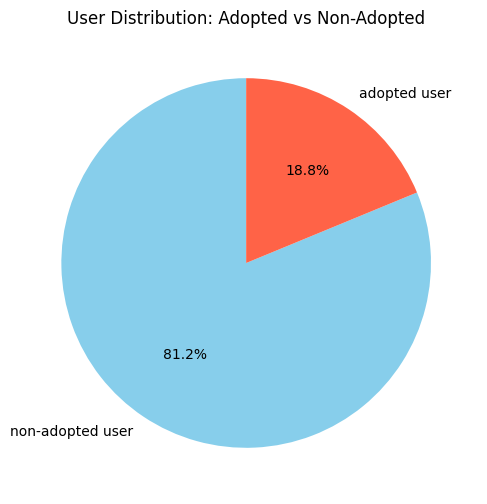

In [96]:
# Total count of each group
df_final['adoption_status'].value_counts()

# Percentage of each group
df_final['adoption_status'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

# Get the counts of each adoption status
adoption_counts = df_final['adoption_status'].value_counts()

# Create the figure for the chart
plt.figure(figsize=(6, 6))

# Create the pie chart
plt.pie(adoption_counts,
        labels=adoption_counts.index,
        autopct='%1.1f%%',   # Show percentages with 1 decimal place
        startangle=90,       # Start the pie chart from 90 degrees
        colors=['skyblue', 'tomato'])

# Add title
plt.title("User Distribution: Adopted vs Non-Adopted")

# Show the chart
plt.show()

# Adopted Users Evolution Over Time




*  Create "adopted_date" Variable





In [103]:
# List to store adopted users with their adoption date
adopted_user_dates = []

# Generate adopted_date based on adoption criteria
for _, row in df_final[df_final['adoption_status'] == 'adopted user'].iterrows():
    user_id = row['user_id']
    login_dates = row['login_time_stamps']

    # Ensure dates are in datetime format and sorted
    login_dates = sorted(pd.to_datetime(login_dates))

    # Look for a window of 3 logins within 7 days
    for i in range(len(login_dates) - 2):
        if (login_dates[i+2] - login_dates[i]).days <= 7:
            adopted_user_dates.append({'user_id': user_id, 'adopted_date': login_dates[i+2]})
            break

# Create final DataFrame
df_adopted_dates = pd.DataFrame(adopted_user_dates)

print(df_adopted_dates)

      user_id        adopted_date
0           2 2014-02-09 03:45:04
1          10 2013-02-06 22:08:03
2          20 2014-03-13 11:46:38
3          33 2014-03-23 06:29:09
4          42 2012-12-25 19:05:07
...       ...                 ...
1651    11965 2014-05-02 07:17:35
1652    11967 2014-03-10 08:12:37
1653    11969 2013-06-03 00:48:14
1654    11975 2013-05-29 11:10:11
1655    11988 2014-03-19 11:04:47

[1656 rows x 2 columns]


•	Generate The Evolution Graph

<ipython-input-105-94ed3de064f1>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  adoption_quarterly = df_adopted_dates.groupby(pd.Grouper(key='adopted_date', freq='Q')).size()


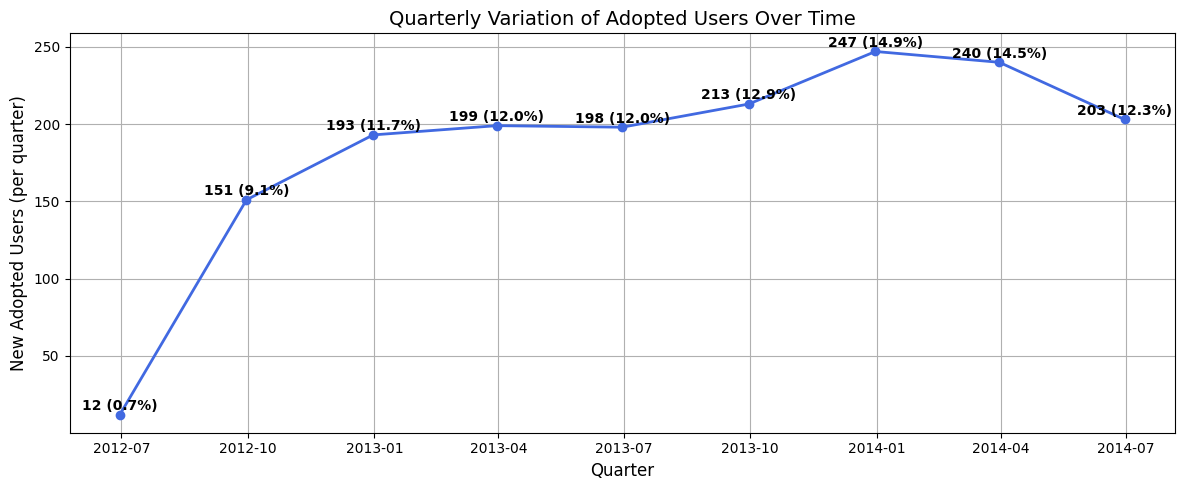

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format
df_adopted_dates['adopted_date'] = pd.to_datetime(df_adopted_dates['adopted_date'])

# Group by quarter
adoption_quarterly = df_adopted_dates.groupby(pd.Grouper(key='adopted_date', freq='Q')).size()

# Total number of adopted users (to calculate percentages)
total_adopted = adoption_quarterly.sum()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(adoption_quarterly.index, adoption_quarterly.values, color='royalblue', linewidth=2, marker='o')

# Add labels with values and percentages
for i, (date, value) in enumerate(adoption_quarterly.items()):
    percent = (value / total_adopted) * 100
    label = f'{value} ({percent:.1f}%)'
    plt.text(date, value + 1, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and axes
plt.title('Quarterly Variation of Adopted Users Over Time', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('New Adopted Users (per quarter)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Adopted Users By Type Of Association

<ipython-input-106-0af6db28f6e2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='pastel')


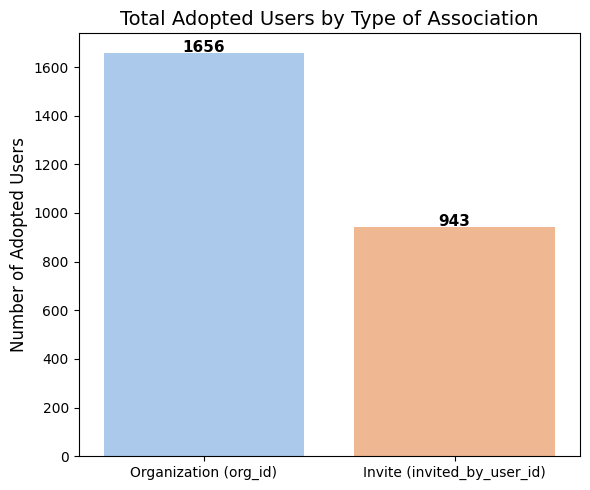

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# Total adopted users by organization (just counting those with org_id)
total_by_org = adopted_only['org_id'].notnull().sum()

# Total adopted users who were invited by another user
total_by_invites = adopted_only['invited_by_user_id'].notnull().sum()

# Prepare data
labels = ['Organization (org_id)', 'Invite (invited_by_user_id)']
values = [total_by_org, total_by_invites]

# Bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=values, palette='pastel')

# Add value labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

# Titles and axes
plt.title('Total Adopted Users by Type of Association', fontsize=14)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()

<ipython-input-19-fb636723dd5e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org_counts.index[:10].astype(str), y=org_counts.values[:10], palette='Blues_d')


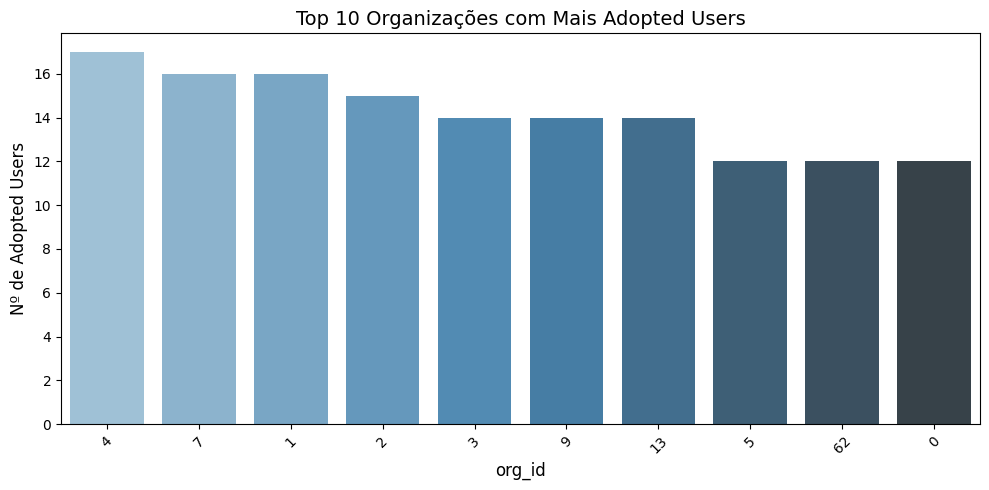

<ipython-input-19-fb636723dd5e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=invited_counts.index[:10].astype(int).astype(str), y=invited_counts.values[:10], palette='Greens_d')


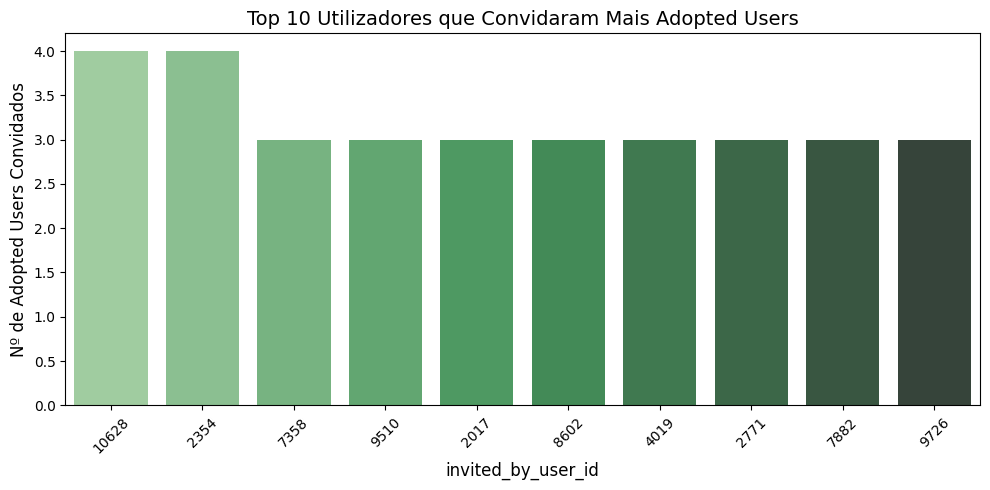

In [19]:
# Filtrar apenas adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

import matplotlib.pyplot as plt
import seaborn as sns

# Contar adopted users por organização
org_counts = adopted_only['org_id'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=org_counts.index[:10].astype(str), y=org_counts.values[:10], palette='Blues_d')
plt.title('Top 10 Organizações com Mais Adopted Users', fontsize=14)
plt.xlabel('org_id', fontsize=12)
plt.ylabel('Nº de Adopted Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remover valores nulos (usuários não convidados por ninguém)
invited_counts = adopted_only.dropna(subset=['invited_by_user_id'])
invited_counts = invited_counts['invited_by_user_id'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=invited_counts.index[:10].astype(int).astype(str), y=invited_counts.values[:10], palette='Greens_d')
plt.title('Top 10 Utilizadores que Convidaram Mais Adopted Users', fontsize=14)
plt.xlabel('invited_by_user_id', fontsize=12)
plt.ylabel('Nº de Adopted Users Convidados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Adopted Users by Account Creation Source

<ipython-input-107-9653c93a5e5d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=creation_counts.index, y=creation_counts.values, palette='Blues_d')


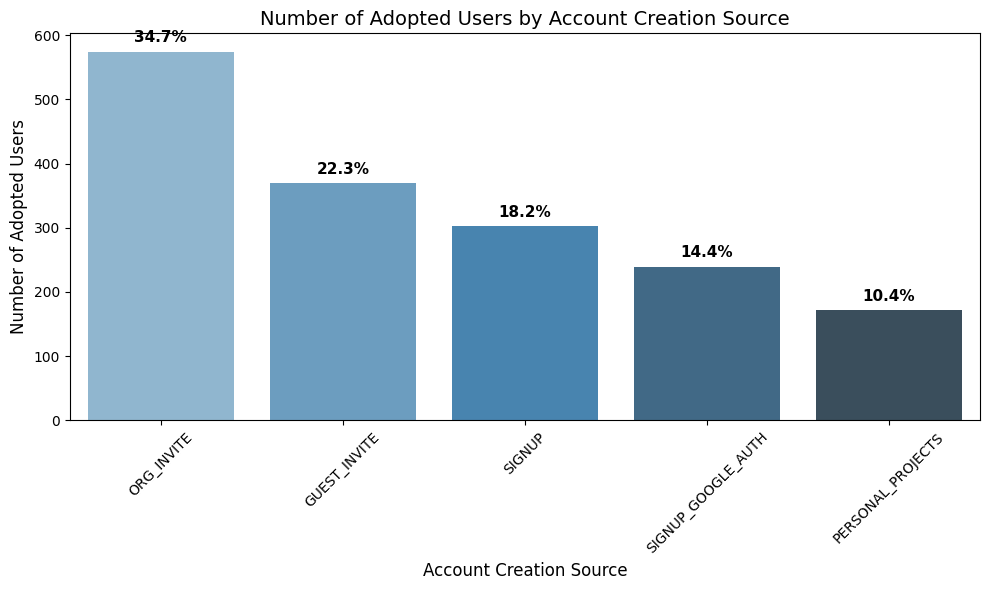

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# 2. Count and calculate percentages
creation_counts = adopted_only['creation_source'].value_counts().sort_values(ascending=False)
creation_percent = (creation_counts / creation_counts.sum()) * 100

# 3. Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=creation_counts.index, y=creation_counts.values, palette='Blues_d')

# 4. Add percentage labels on top of each bar
for i, (count, pct) in enumerate(zip(creation_counts.values, creation_percent.values)):
    ax.text(i, count + 10, f'{pct:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 5. Titles and axes
plt.title('Number of Adopted Users by Account Creation Source', fontsize=14)
plt.xlabel('Account Creation Source', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

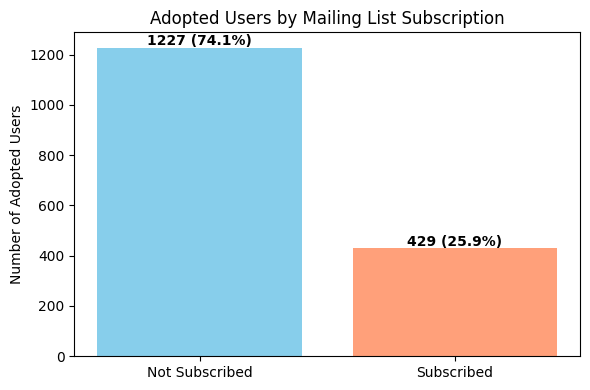

In [108]:
# Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# Count how many are subscribed vs not subscribed
mailing_counts = adopted_only['opted_in_to_mailing_list'].value_counts()

# Total for percentage calculation
total_adopted = mailing_counts.sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bars = plt.bar(
    mailing_counts.index.map({0: 'Not Subscribed', 1: 'Subscribed'}),
    mailing_counts.values,
    color=['skyblue', 'lightsalmon']
)

# Add labels with values + percentage
for i, val in enumerate(mailing_counts.values):
    percent = (val / total_adopted) * 100
    label = f"{val} ({percent:.1f}%)"
    plt.text(i, val + 10, label, ha='center', fontsize=10, fontweight='bold')

plt.title('Adopted Users by Mailing List Subscription')
plt.ylabel('Number of Adopted Users')
plt.tight_layout()
plt.show()

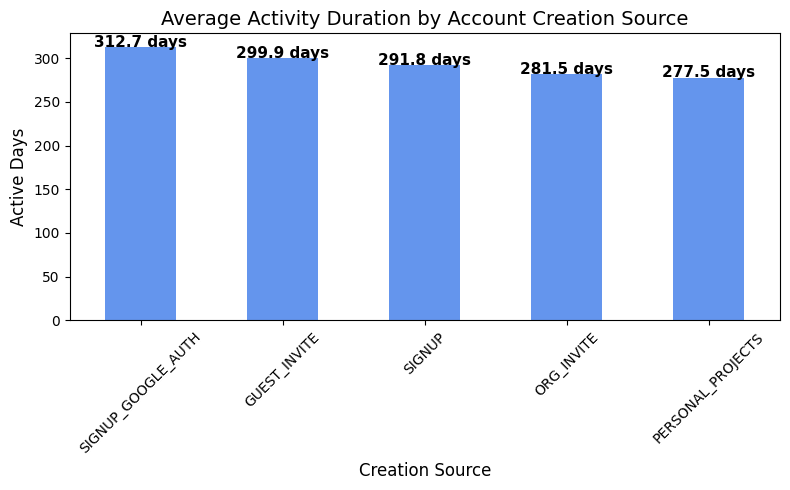

In [109]:
# 1. Filter adopted users
adopted_ids = df_final[df_final['adoption_status'] == 'adopted user']['user_id']

# 2. Filter only the login records of adopted users
adopted_engagement = data_engage[data_engage['user_id'].isin(adopted_ids)].copy()

# 3. Reset index (in case time_stamp is set as index)
adopted_engagement = adopted_engagement.reset_index()

# 4. Ensure datetime format
adopted_engagement['time_stamp'] = pd.to_datetime(adopted_engagement['time_stamp'])

# 5. Calculate user lifetime: last login - first login
user_lifetime = adopted_engagement.groupby('user_id')['time_stamp'].agg(['min', 'max'])
user_lifetime['lifetime_days'] = (user_lifetime['max'] - user_lifetime['min']).dt.days

# 6. Reset index and merge with df_final to get user metadata
user_lifetime = user_lifetime[['lifetime_days']].reset_index()
engagement_summary = pd.merge(user_lifetime, df_final, on='user_id', how='left')

# 7. Calculate average activity duration per creation source
creation_stats = engagement_summary.groupby('creation_source')['lifetime_days'].mean().sort_values(ascending=False)

# 8. Bar chart with labels
plt.figure(figsize=(8, 5))
ax = creation_stats.plot(kind='bar', color='cornflowerblue')

# Add value labels on top of the bars
for i, v in enumerate(creation_stats.values):
    ax.text(i, v + 0.5, f'{v:.1f} days', ha='center', fontsize=11, fontweight='bold')

plt.title('Average Activity Duration by Account Creation Source', fontsize=14)
plt.ylabel('Active Days', fontsize=12)
plt.xlabel('Creation Source', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

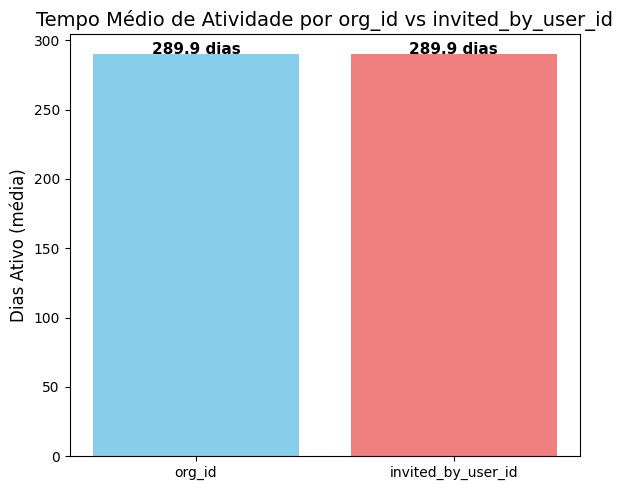

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar os adopted users
adopted_ids = df_final[df_final['adoption_status'] == 'adopted user']['user_id']
adopted_engagement = data_engage[data_engage['user_id'].isin(adopted_ids)].copy()

# 2. Resetar índice e garantir datetime
adopted_engagement = adopted_engagement.reset_index()
adopted_engagement['time_stamp'] = pd.to_datetime(adopted_engagement['time_stamp'])

# 3. Calcular tempo de atividade por user
user_lifetime = adopted_engagement.groupby('user_id')['time_stamp'].agg(['min', 'max'])
user_lifetime['lifetime_days'] = (user_lifetime['max'] - user_lifetime['min']).dt.days
user_lifetime = user_lifetime[['lifetime_days']].reset_index()

# 4. Juntar com info dos users
engagement_summary = pd.merge(user_lifetime, df_final, on='user_id', how='left')

# 5. Calcular médias
avg_by_org = engagement_summary.groupby('org_id')['lifetime_days'].mean().mean()  # média das médias por organização
avg_by_inviter = engagement_summary.dropna(subset=['invited_by_user_id']) \
                                   .groupby('invited_by_user_id')['lifetime_days'].mean().mean()  # média das médias por convidador

# 6. Criar DataFrame com os dois valores
data_compare = pd.DataFrame({
    'Categoria': ['org_id', 'invited_by_user_id'],
    'Tempo Médio (dias)': [avg_by_org, avg_by_inviter]
})

# 7. Gráfico
plt.figure(figsize=(6, 5))
ax = plt.bar(data_compare['Categoria'], data_compare['Tempo Médio (dias)'], color=['skyblue', 'lightcoral'])

# Adicionar os valores no topo das barras
for i, v in enumerate(data_compare['Tempo Médio (dias)']):
    plt.text(i, v + 0.5, f'{v:.1f} dias', ha='center', fontsize=11, fontweight='bold')

plt.title('Tempo Médio de Atividade por org_id vs invited_by_user_id', fontsize=14)
plt.ylabel('Dias Ativo (média)', fontsize=12)
plt.tight_layout()
plt.show()

# ANÁLISE PREDITIVA

Analisar comportamento de utilizadores

Procurar explicações (fatores que influenciam adoção)

Tens variáveis misturadas (numéricas, categóricas)

Queres insights + alguma capacidade preditiva

OPÇÕES DE MODELOS PREDITIVOS:


*  Priorizar explicação:
    Regressão Logística + análise de coeficientes
    Árvore de Decisão para ver regras claras
*   Priorizar Performance Preditiva
    Random Forest (bom compromisso entre performance e simplicidade)
    XGBoost se quiser afinar ao detalhe



Prever se um utilizador vai tornar-se adopted user (1) ou não (0) com base em variáveis como:

    creation_source

    org_id

    opted_in_to_mailing_list

    enabled_for_marketing_drip

    invited_by_user_id

    Variável | Tipo | Faz sentido incluir? | Observação
creation_source | Categórica | ✅ Sim | Pode indicar origem de utilizadores com maior propensão à adoção
org_id | Categórica | ✅ Sim (com cuidado) | Algumas orgs têm perfis de uso mais intensos
opted_in_to_mailing_list | Binária | ✅ Sim | Pode indicar maior interesse
enabled_for_marketing_drip | Binária | ✅ Sim | Pode refletir exposição a conteúdos de onboarding
invited_by_user_id | Numérica | ✅ Sim (convertido para "foi convidado?") | Já simplificámos isso como foi_convidado


variáveis adicionais recomendadas:

Variável | Tipo | Relevância Esperada
dias_ate_primeiro_login | Numérica | Alta 📈
n_logins | Numérica | Alta 📈
dias_distintos | Numérica | Média/Alta 📊
foi_convidado_por_adotado | Binária | Média
org_size | Numérica | Alta

#Regressão Logística

Passo 1. Preparar os dados
- Criar variável alvo (target) e features úteis

In [26]:
# Variável alvo
df_final['adopted'] = df_final['adoption_status'].apply(lambda x: 1 if x == 'adopted user' else 0)

# Feature: foi convidado ou não
df_final['foi_convidado'] = df_final['invited_by_user_id'].notnull().astype(int)

# Features selecionadas
features = [
    'creation_source',
    'org_id',
    'opted_in_to_mailing_list',
    'enabled_for_marketing_drip',
    'foi_convidado'
]

# Dataset com as variáveis + target
df_model = df_final[features + ['adopted']].copy()

# One-hot encoding para variável categórica (creation_source)
df_model = pd.get_dummies(df_model, columns=['creation_source'], drop_first=True)

Passo 2. Separar treino e teste

In [27]:
from sklearn.model_selection import train_test_split

X = df_model.drop('adopted', axis=1)
y = df_model['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Passo 3. Treinar o modelo

In [28]:
from sklearn.linear_model import LogisticRegression

# Criar modelo com regularização L2 (default)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Passo 4. Avaliação do modelo

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1417    0]
 [ 348    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1417
           1       0.00      0.00      0.00       348

    accuracy                           0.80      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.64      0.80      0.72      1765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Passo 5. Interpretar os coeficientes (impacto de cada variável)

In [30]:
import pandas as pd

coef = pd.Series(model.coef_[0], index=X.columns)
coef = coef.sort_values(ascending=False)

print(coef)

enabled_for_marketing_drip            0.067713
opted_in_to_mailing_list              0.066776
org_id                                0.001391
foi_convidado                        -0.117140
creation_source_PERSONAL_PROJECTS    -0.201938
creation_source_ORG_INVITE           -0.257280
creation_source_SIGNUP_GOOGLE_AUTH   -0.459333
creation_source_SIGNUP               -0.550851
dtype: float64


Passo 6. Gráfico

Coeficiente positivo → aumenta probabilidade de adoção | Coeficiente negativo → diminui probabilidade de adoção

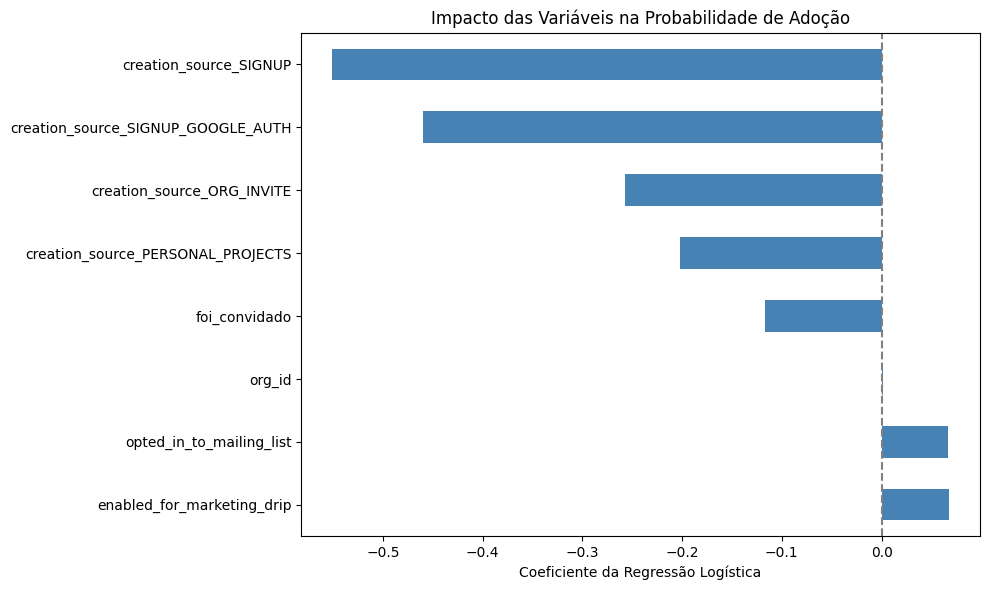

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coef.plot(kind='barh', color='steelblue')
plt.title('Impacto das Variáveis na Probabilidade de Adoção')
plt.xlabel('Coeficiente da Regressão Logística')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Variável | Coeficiente | Interpretação
creation_source_SIGNUP | ❌ Negativo forte | Utilizadores que criam conta diretamente têm MENOR probabilidade de adoção
creation_source_SIGNUP_GOOGLE_AUTH | ❌ Negativo forte | Também menor probabilidade — possível fricção no onboarding via Google?
creation_source_ORG_INVITE | ❌ Negativo moderado | Surpreendente, devia ser mais positivo... talvez por orgs grandes e inativas
creation_source_PERSONAL_PROJECTS | ❌ Negativo leve | Sem grande efeito, mas ainda assim negativo
foi_convidado | ❌ Negativo leve | Surpreendente: esperávamos que fosse positivo — sinal de que convite não garante engajamento
org_id | ❌ Negativo leve | Provavelmente está a funcionar como ruído (orgs variadas)
opted_in_to_mailing_list | ✅ Positivo | Utilizadores que aceitaram comunicações estão mais propensos a adotar
enabled_for_marketing_drip | ✅ Positivo leve | Participar em marketing ajuda, mas pouco — talvez os conteúdos não estejam a converter bem

# Árvore de Decisão

Passo 1 Preparar os dados

In [33]:
# Variável target
df_final['adopted'] = df_final['adoption_status'].apply(lambda x: 1 if x == 'adopted user' else 0)

# Feature binária: foi convidado ou não
df_final['foi_convidado'] = df_final['invited_by_user_id'].notnull().astype(int)

# Features selecionadas
features = [
    'creation_source',
    'org_id',
    'opted_in_to_mailing_list',
    'enabled_for_marketing_drip',
    'foi_convidado'
]

df_model = df_final[features + ['adopted']].copy()

# One-hot encoding da variável categórica
df_model = pd.get_dummies(df_model, columns=['creation_source'], drop_first=True)

Passo 2 Separar treino e teste

In [34]:
from sklearn.model_selection import train_test_split

X = df_model.drop('adopted', axis=1)
y = df_model['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Passo 3 Treinar o modelo de Árvore de Decisão

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Criar a árvore com limite de profundidade para evitar overfitting
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Passo 4 Avaliação do modelo

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1417    0]
 [ 348    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1417
           1       0.00      0.00      0.00       348

    accuracy                           0.80      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.64      0.80      0.72      1765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Passo 5 Visualizar a Árvore de Decisão

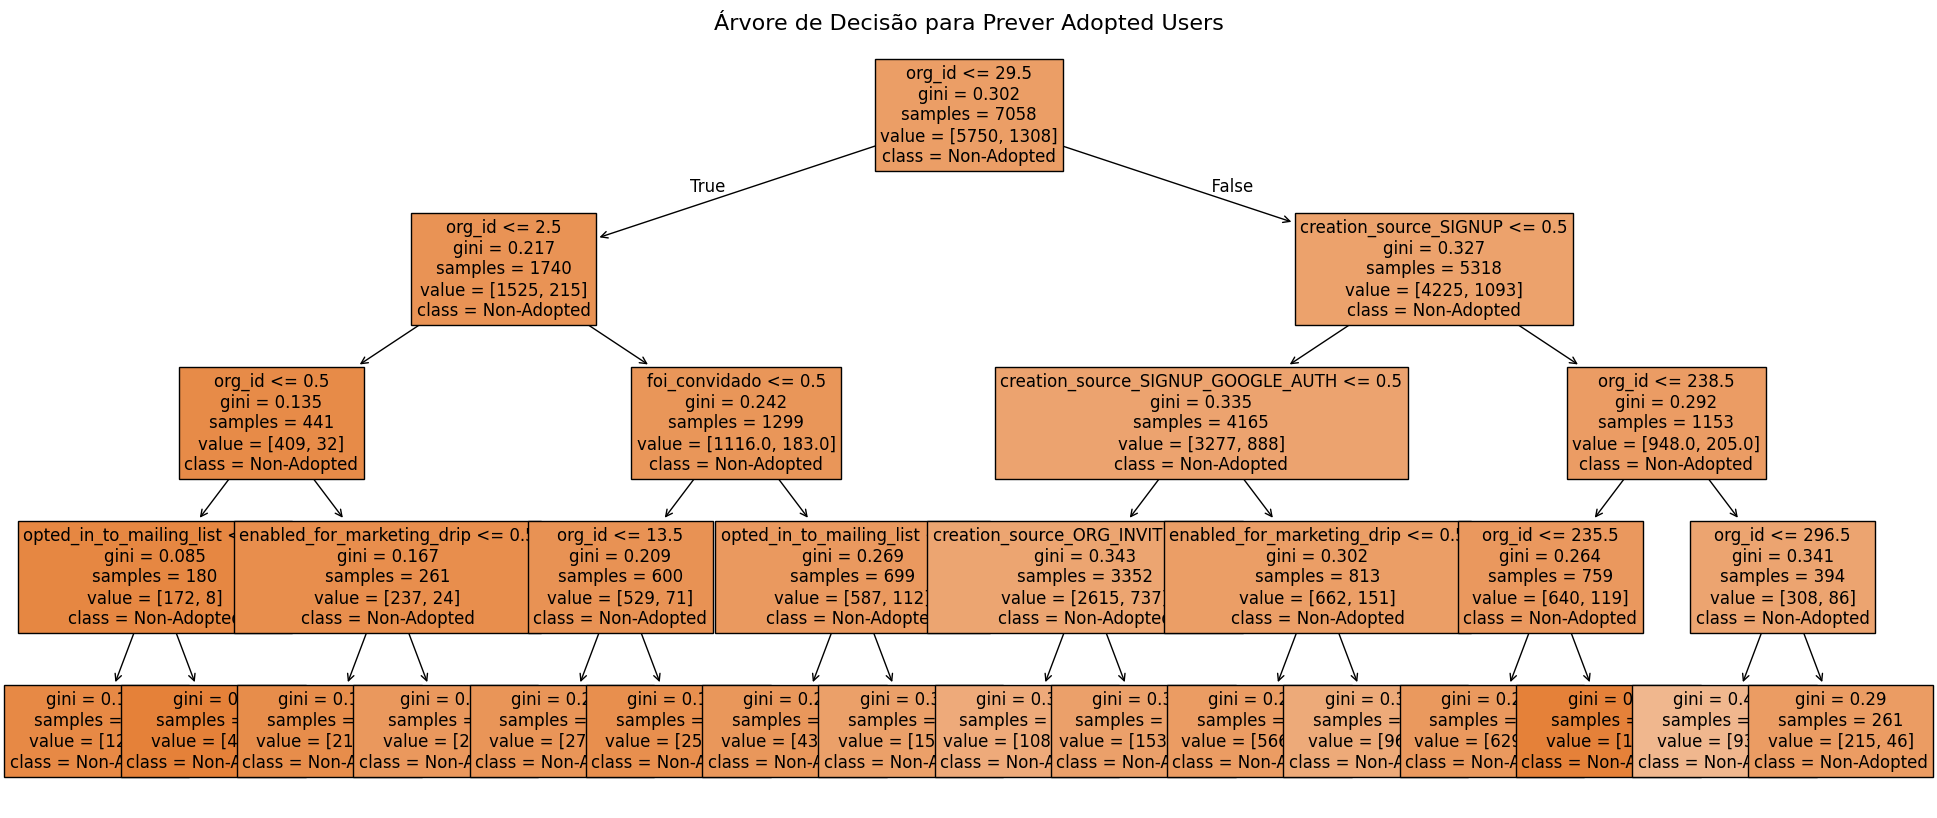

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))  # Aumenta também a figura
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['Non-Adopted', 'Adopted'],
    filled=True,
    fontsize=12  # ← Aumentar texto
)
plt.title("Árvore de Decisão para Prever Adopted Users", fontsize=16)
plt.show()

<Axes: title={'center': 'Importância das Variáveis'}>

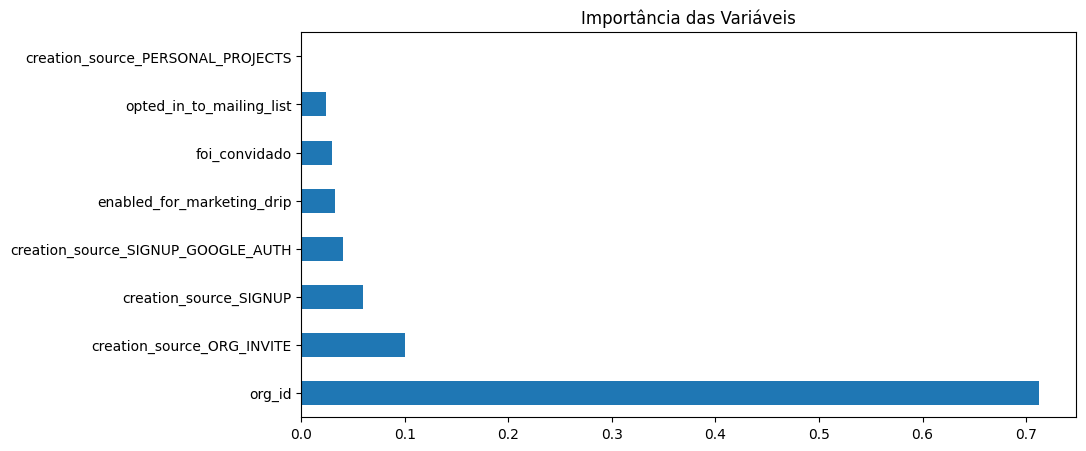

In [38]:
import pandas as pd

feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), title="Importância das Variáveis")